In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-and-lifestyle-dataset/health_lifestyle_dataset.csv


In [2]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("/kaggle/input/health-and-lifestyle-dataset/health_lifestyle_dataset.csv")
df

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,53,Male,33.1,4726,3.9,2.0,3118,0,1,56,105,76,282,0,0
99996,99997,22,Male,35.1,11554,4.5,3.1,1967,0,0,51,149,77,192,0,0
99997,99998,37,Male,18.9,3924,3.8,1.0,2328,0,0,69,92,117,218,0,0
99998,99999,72,Female,27.8,16110,5.6,0.8,3093,0,0,93,164,72,188,0,0


In [4]:
# LETS UNDERSTAND ABOUT DATASET
print(f"shape of dataset is {df.shape}")
print("\n ======================================================================\n")
print(f"columns present in the dataset are {df.columns}")
print("\n ======================================================================\n")
print(f"columns present in the dataset with there datatypes\n {df.dtypes}")
print("\n ======================================================================\n")
print(f"information about dataset \n {df.info()}")
print("\n ======================================================================\n")
print(f"data discritbtion of every numerical feature \n{df.describe()}")
print("\n ======================================================================\n")
print(f"data describtion of non numerical datatype \n {df.describe(include=['float64','int64'])}")
print("\n ======================================================================\n")
print(f"numercial columns in dataset are {df.select_dtypes(include = ['float','int']).columns.to_list()}")
print("\n ======================================================================\n")
print(f"non numerical columns in dataset are {df.select_dtypes(include = 'O').columns.to_list()}")

shape of dataset is (100000, 16)


columns present in the dataset are Index(['id', 'age', 'gender', 'bmi', 'daily_steps', 'sleep_hours',
       'water_intake_l', 'calories_consumed', 'smoker', 'alcohol',
       'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',
       'family_history', 'disease_risk'],
      dtype='object')


columns present in the dataset with there datatypes
 id                     int64
age                    int64
gender                object
bmi                  float64
daily_steps            int64
sleep_hours          float64
water_intake_l       float64
calories_consumed      int64
smoker                 int64
alcohol                int64
resting_hr             int64
systolic_bp            int64
diastolic_bp           int64
cholesterol            int64
family_history         int64
disease_risk           int64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column         

# Dataset Observations

## General Information
- **Shape of dataset:** (100000, 16) → 100,000 rows and 16 columns.  
- **Memory usage:** ~12.2 MB.  
- **Target column:** `disease_risk` (binary: 0 or 1).  
- **Features:** Mix of numerical (15) and categorical (1).

---

## Column Overview
- **Numerical Columns (15):**  
  `id, age, bmi, daily_steps, sleep_hours, water_intake_l, calories_consumed, smoker, alcohol, resting_hr, systolic_bp, diastolic_bp, cholesterol, family_history, disease_risk`  

- **Categorical Columns (1):**  
  `gender`

---



In [5]:
# lets check for null values (but we can observe it from df.info that there is no null values in dataset)
df.isna().sum()

id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64

In [6]:
# lets see the distribution of disease_risk
df["disease_risk"].value_counts()


disease_risk
0    75179
1    24821
Name: count, dtype: int64

## 📊 Class Imbalance Observation

### Why?
- A balanced dataset usually means classes are close to **50-50** or at least within a similar range.  
- In this dataset, one class (`0`) has **3 times more samples** than the other (`1`).  

### Impact
- Models may **bias towards predicting class 0** because it’s the majority class.  
- Accuracy might look high, but **recall/precision for the minority class (1) will suffer**.  

### Next Steps (to handle imbalance)
- ✅ Use **stratified train-test split**  
- ✅ Evaluate using **F1-score, Precision, Recall, and ROC-AUC** (not just accuracy)  
- ✅ Apply techniques such as:  
  - **Resampling** (SMOTE, undersampling, oversampling)  
  - **Class weights** (`class_weight="balanced"` in sklearn/keras)  

👉 **Conclusion:** The dataset is imbalanced (**75% vs 25%**).



In [7]:
# check for duplicate values
df.duplicated().sum()

0

In [8]:
# LETS DROP ID COLUMNS
df.drop(columns ="id",inplace = True)

In [9]:
# lets check values distribution of dataset
for col in df.columns:
    if df[col].nunique() < 15:
        print(f" FOR  {col} \n")
        print(f"number of classes in {col} are {df[col].nunique()}")
        print((f"values counts for each class {df[col].value_counts()}"))
        print("\n\n")
    else:
        print(f" FOR  {col} \n")
        print(f"number of unique value  in {col} are {df[col].nunique()}")
        print(f"average of {col} = {df[col].mean()}")
       
        print(f"median of {col} = {df[col].median()}")
        print("\n\n")
        
        


 FOR  age 

number of unique value  in age are 62
average of age = 48.52599
median of age = 48.0



 FOR  gender 

number of classes in gender are 2
values counts for each class gender
Male      50132
Female    49868
Name: count, dtype: int64



 FOR  bmi 

number of unique value  in bmi are 221
average of bmi = 29.02479
median of bmi = 29.0



 FOR  daily_steps 

number of unique value  in daily_steps are 18921
average of daily_steps = 10479.87029
median of daily_steps = 10468.0



 FOR  sleep_hours 

number of unique value  in sleep_hours are 71
average of sleep_hours = 6.491783999999999
median of sleep_hours = 6.5



 FOR  water_intake_l 

number of unique value  in water_intake_l are 46
average of water_intake_l = 2.751496
median of water_intake_l = 2.8



 FOR  calories_consumed 

number of unique value  in calories_consumed are 2800
average of calories_consumed = 2603.3412
median of calories_consumed = 2603.0



 FOR  smoker 

number of classes in smoker are 2
values counts for e

In [10]:
df["disease_risk"].unique()

array([0, 1])

In [11]:
# distribution as per our target values

for col in df.columns:
    print(f"\n{'#'*30}\nColumn: {col}\n{'#'*30}\n")
    
    if df[col].nunique() < 15:  # Categorical
        counts = df.groupby('disease_risk')[col].value_counts()
        print("Counts per class per disease_risk:\n", counts, "\n")
        
        for disease_class in df['disease_risk'].unique():
            subset = counts[disease_class]
            percentages = (subset / subset.sum() * 100).round(2)
            print(f"Percentages for disease_risk = {disease_class}:\n{percentages}\n")
            
    else:  # Numerical
        stats = df.groupby('disease_risk')[col].agg(['mean', 'median', 'count'])
        stats['percentage'] = (stats['count'] / stats['count'].sum() * 100).round(2)
        print(f"Numerical stats per disease_risk:\n{stats}\n")



##############################
Column: age
##############################

Numerical stats per disease_risk:
                   mean  median  count  percentage
disease_risk                                      
0             48.508812    48.0  75179       75.18
1             48.578019    49.0  24821       24.82


##############################
Column: gender
##############################

Counts per class per disease_risk:
 disease_risk  gender
0             Male      37731
              Female    37448
1             Female    12420
              Male      12401
Name: count, dtype: int64 

Percentages for disease_risk = 0:
gender
Male      50.19
Female    49.81
Name: count, dtype: float64

Percentages for disease_risk = 1:
gender
Female    50.04
Male      49.96
Name: count, dtype: float64


##############################
Column: bmi
##############################

Numerical stats per disease_risk:
                   mean  median  count  percentage
disease_risk                        

## visulization

In [12]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

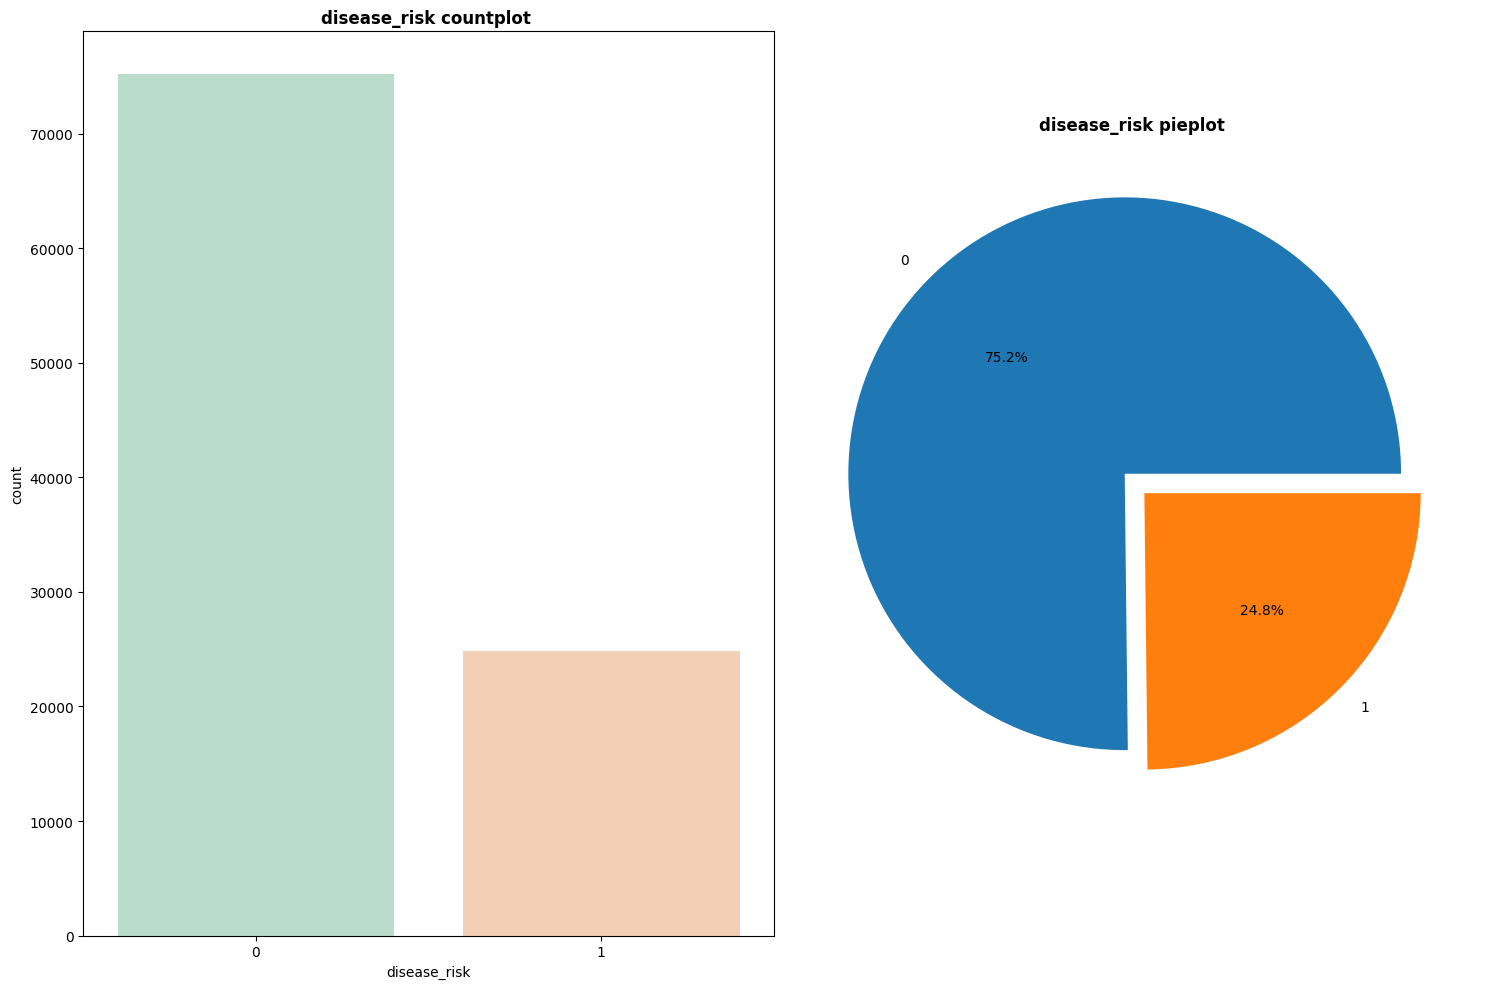

In [13]:
# first visulization for our target feature "disease_risk"
fig,ax = plt.subplots(1,2,figsize = (15,10))
sns.countplot(x = "disease_risk",data = df ,palette = "Pastel2",ax = ax[0])
ax[0].set_title(f"disease_risk countplot ",fontsize = "large",fontweight='bold')
ax[1].pie(df["disease_risk"].value_counts(),labels =df["disease_risk"].value_counts().index,explode =[0.05]*len(df["disease_risk"].value_counts()),autopct = "%0.01f%%" )
ax[1].set_title(f"disease_risk pieplot ",fontsize = "large",fontweight='bold')

plt.tight_layout()
plt.show()


##  DISTRIBUTIN FOR ALL FEATURE


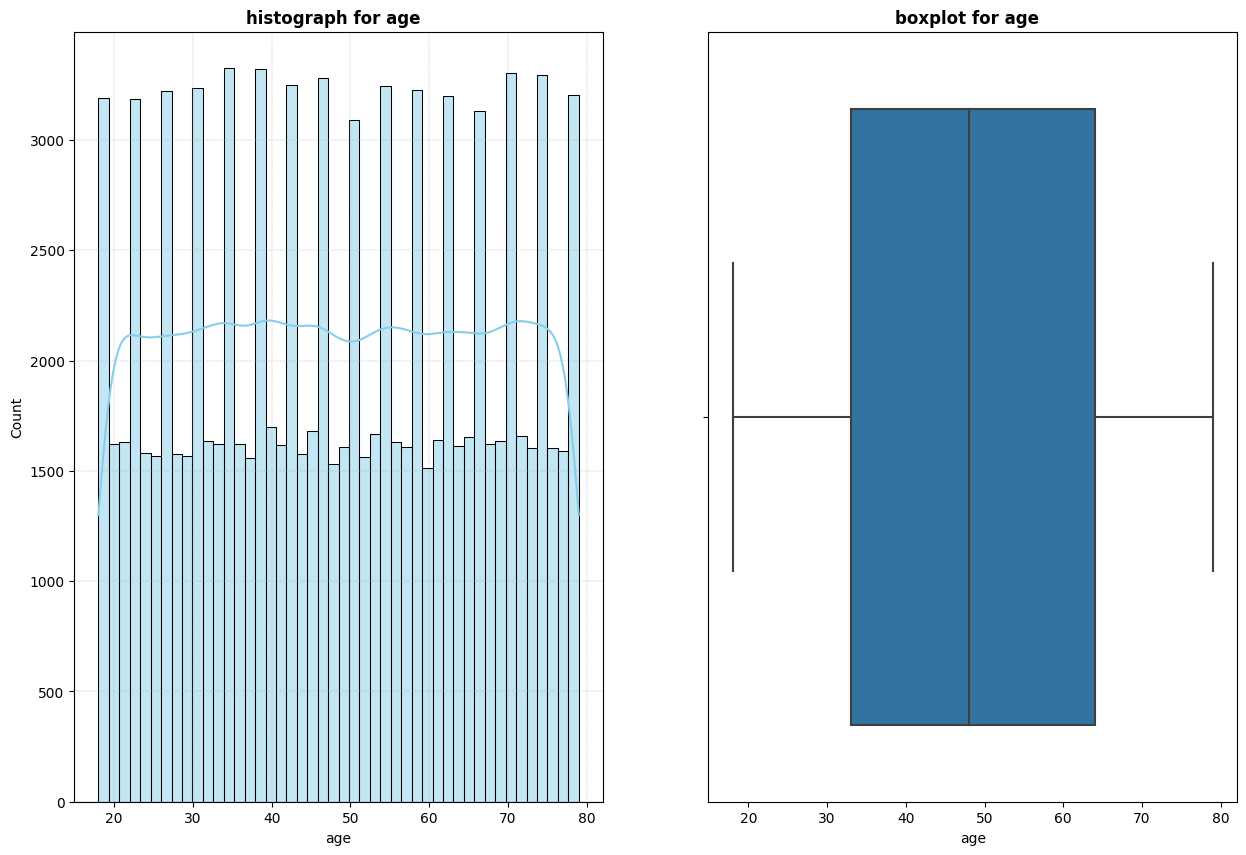

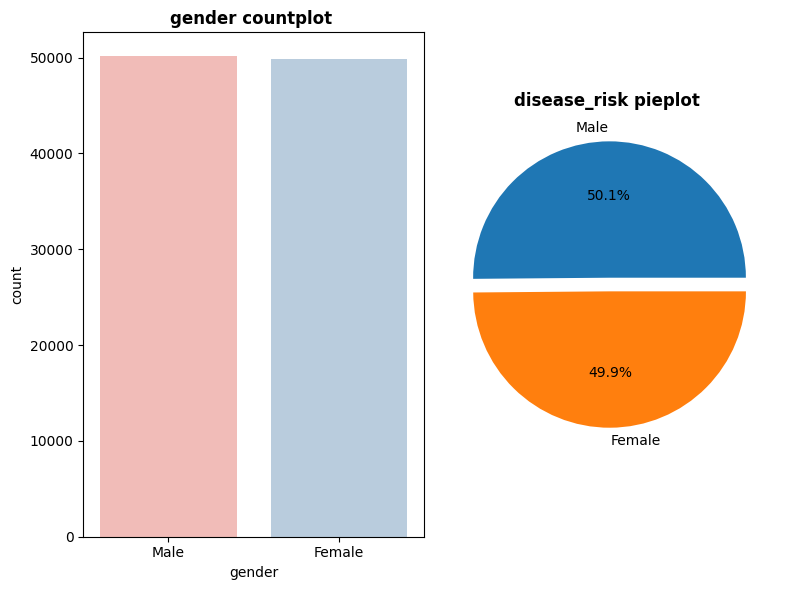

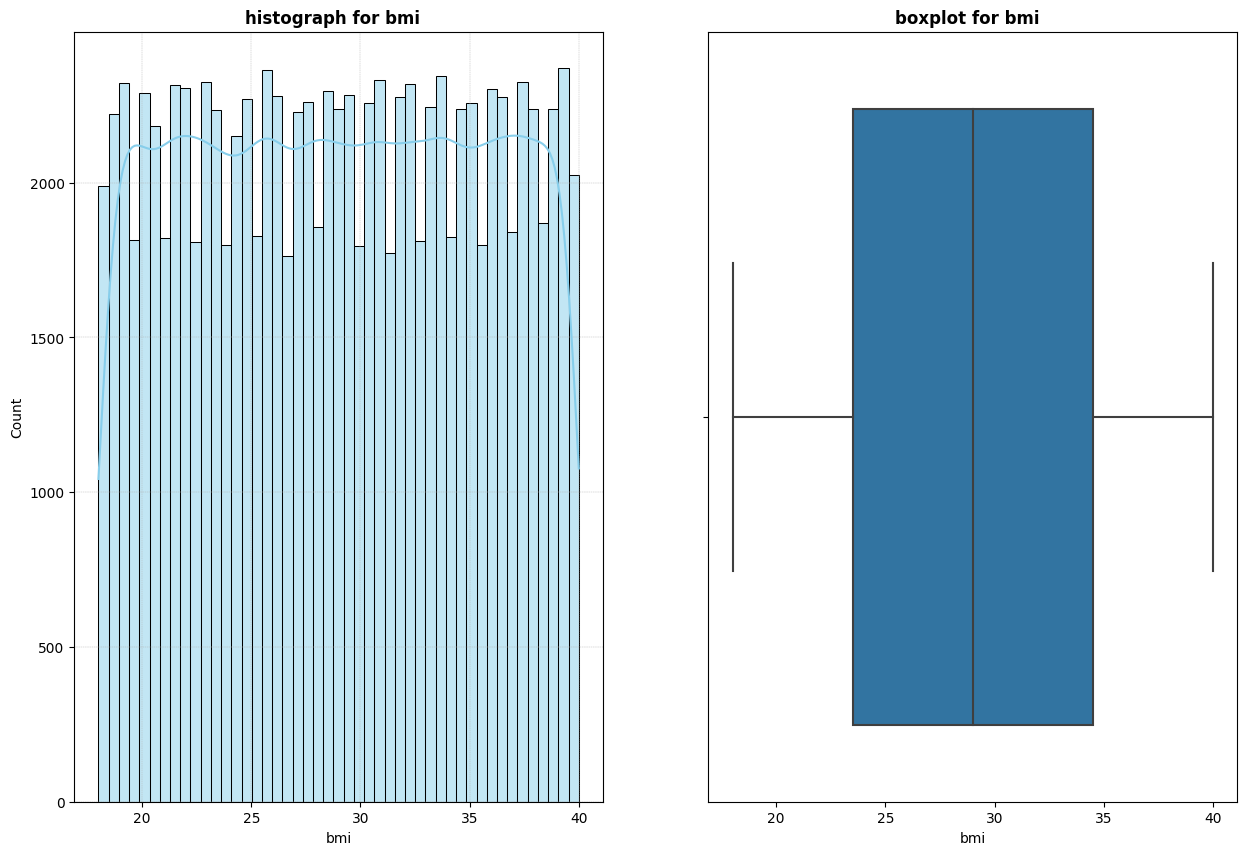

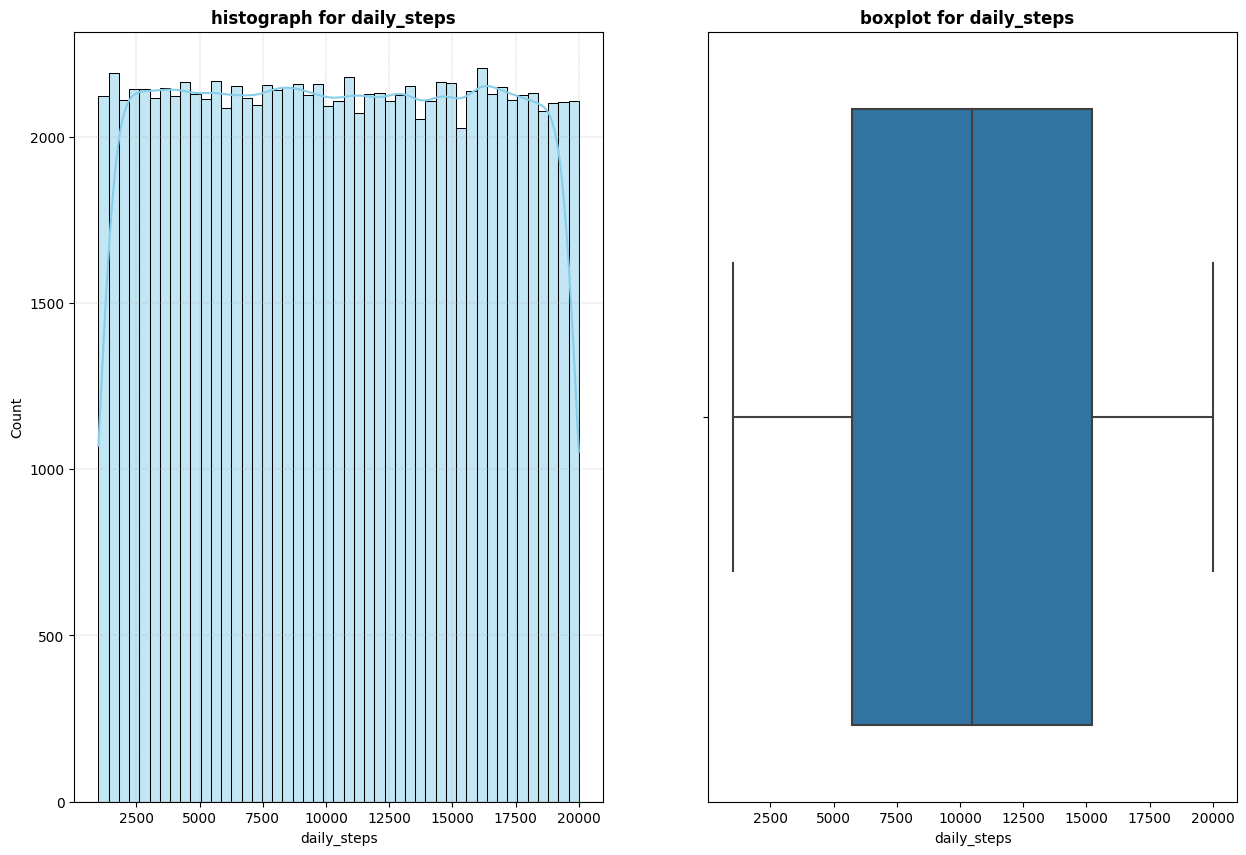

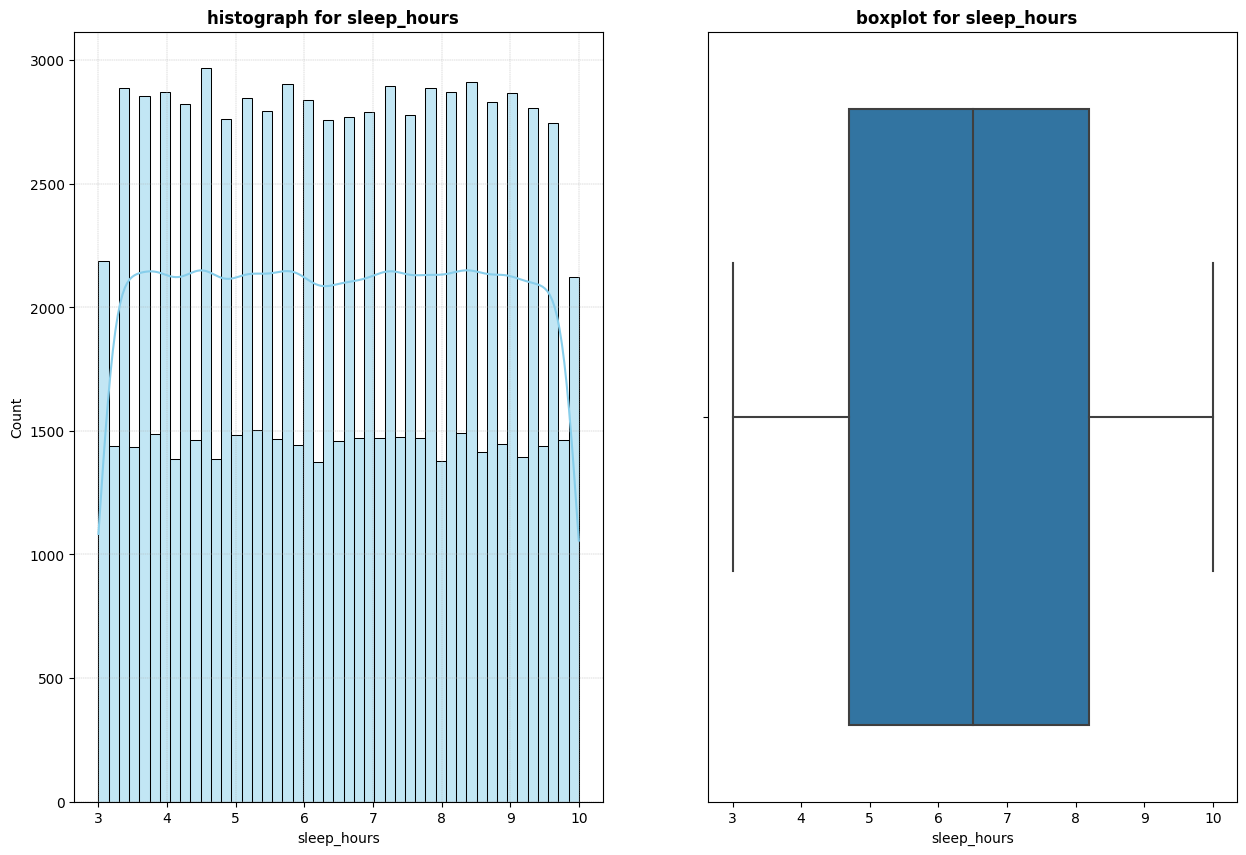

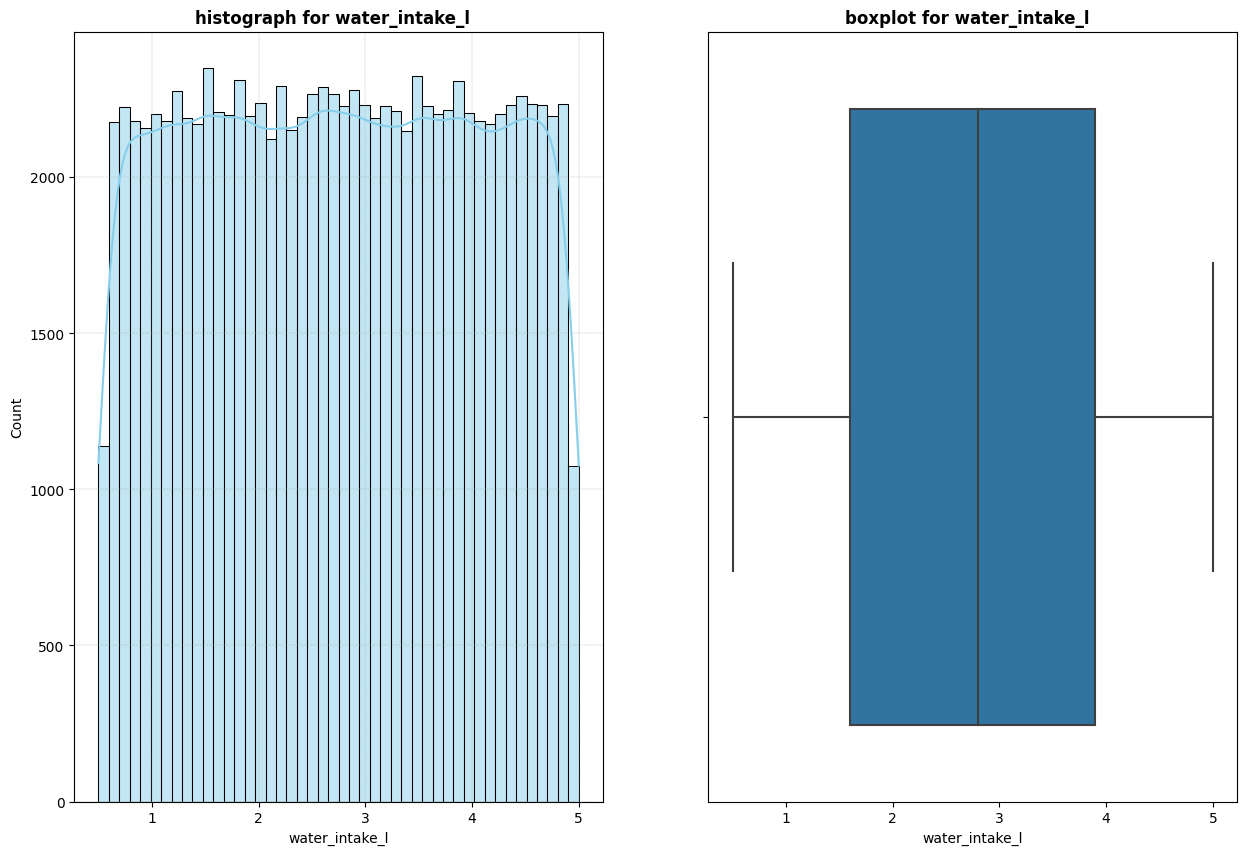

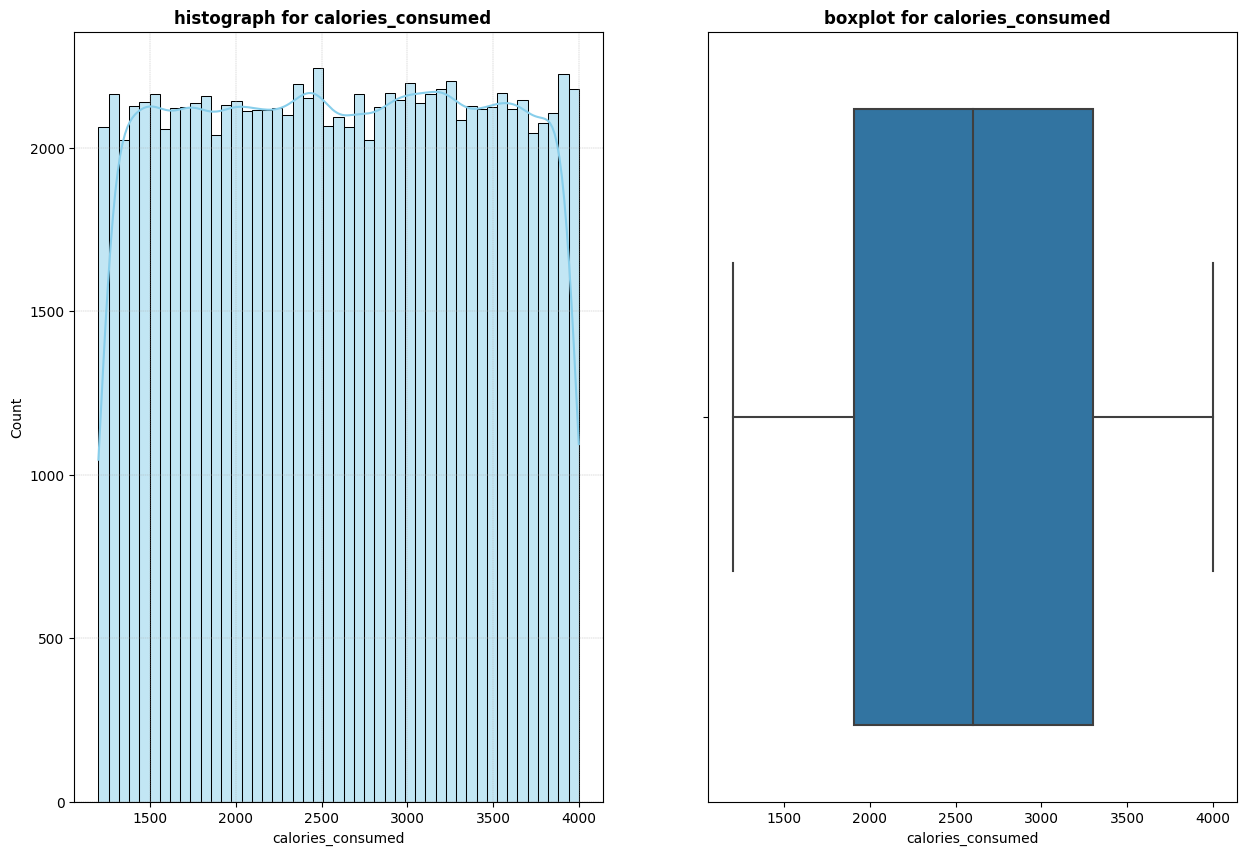

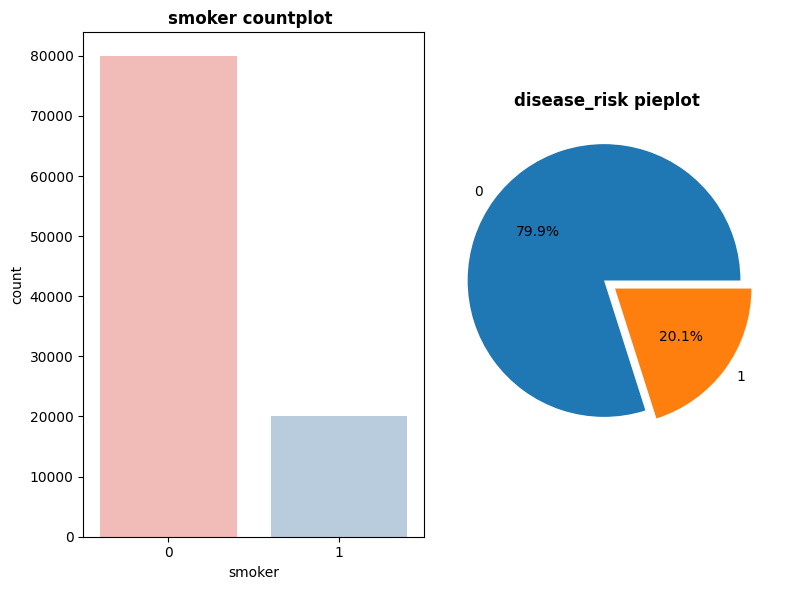

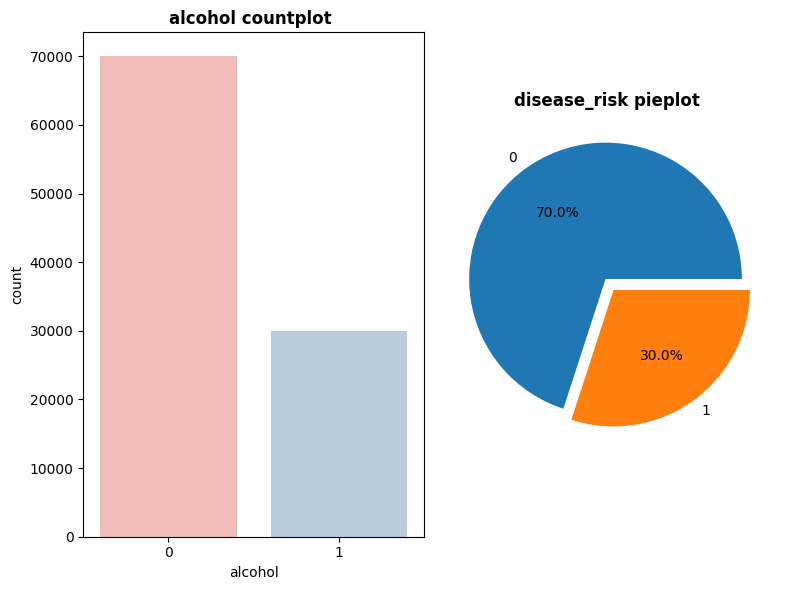

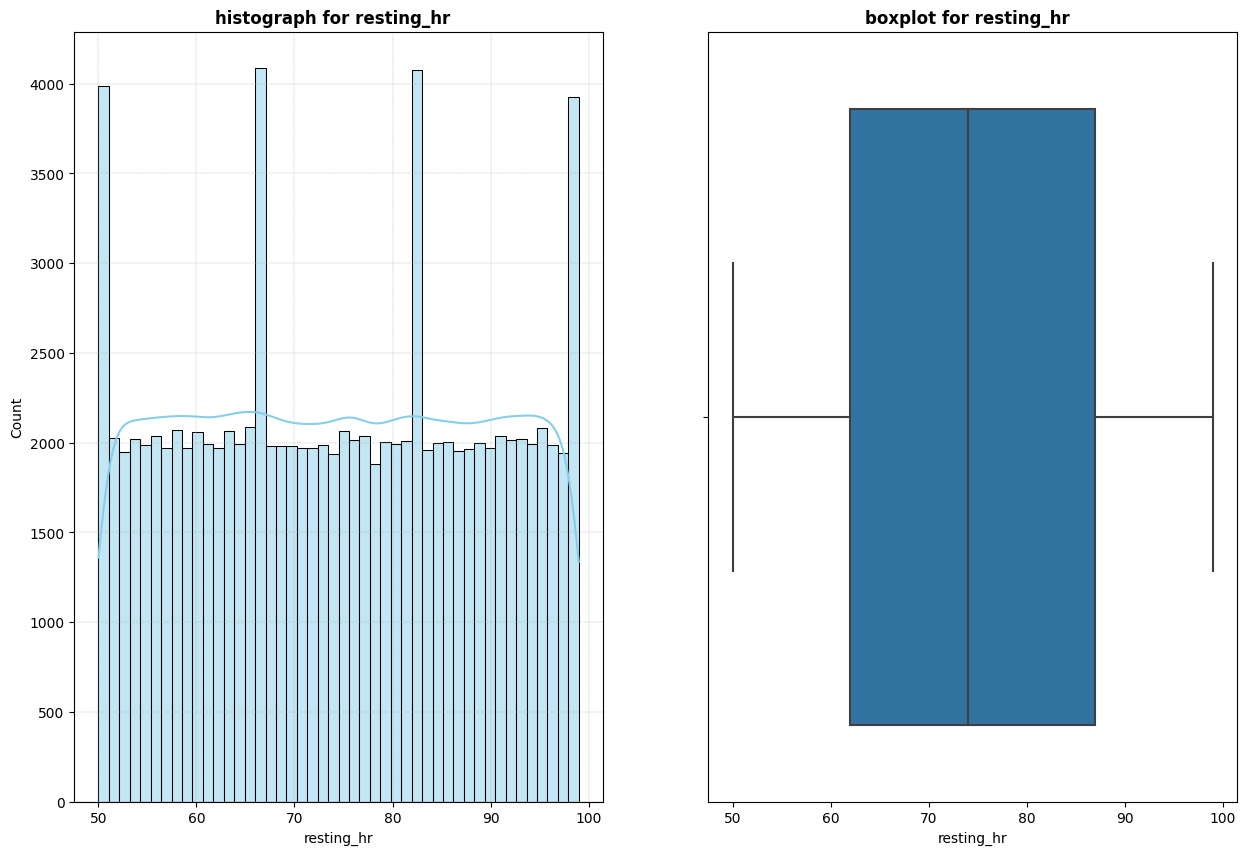

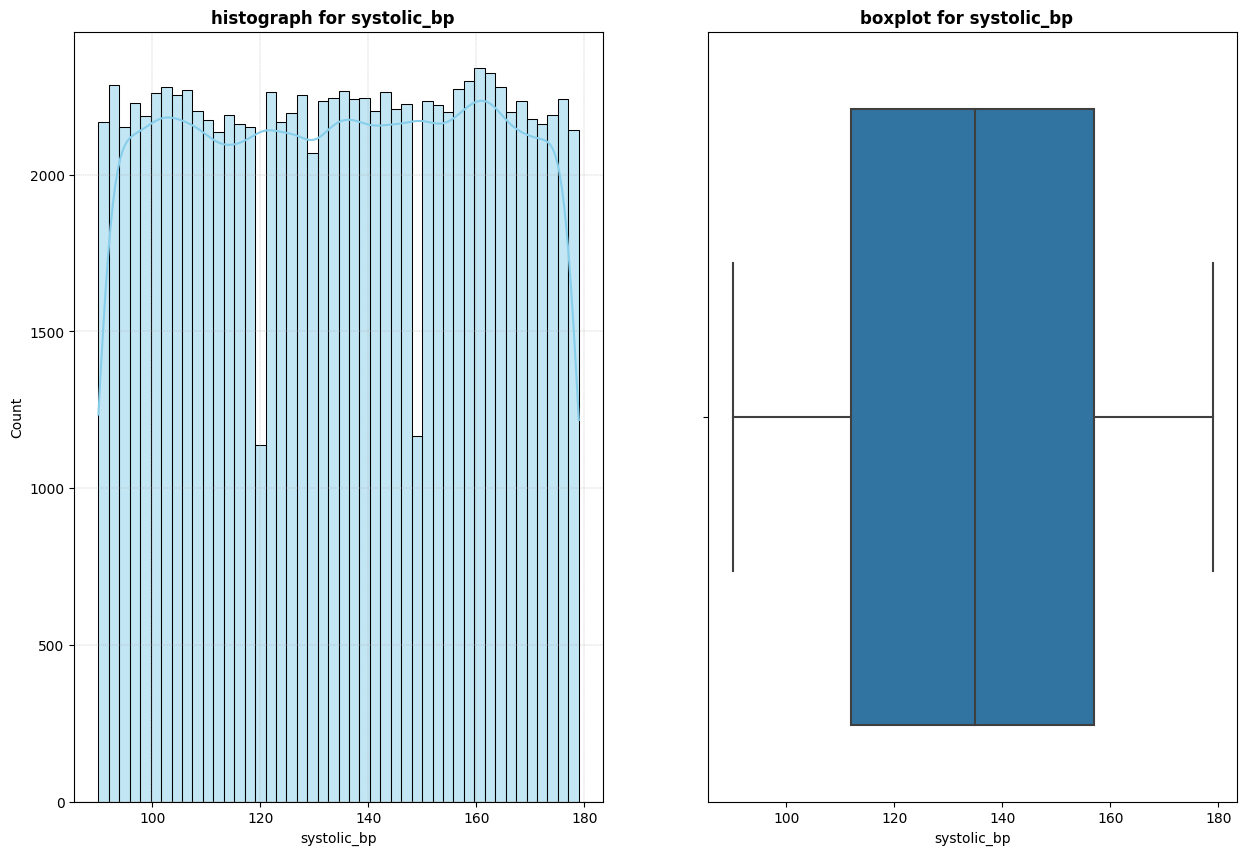

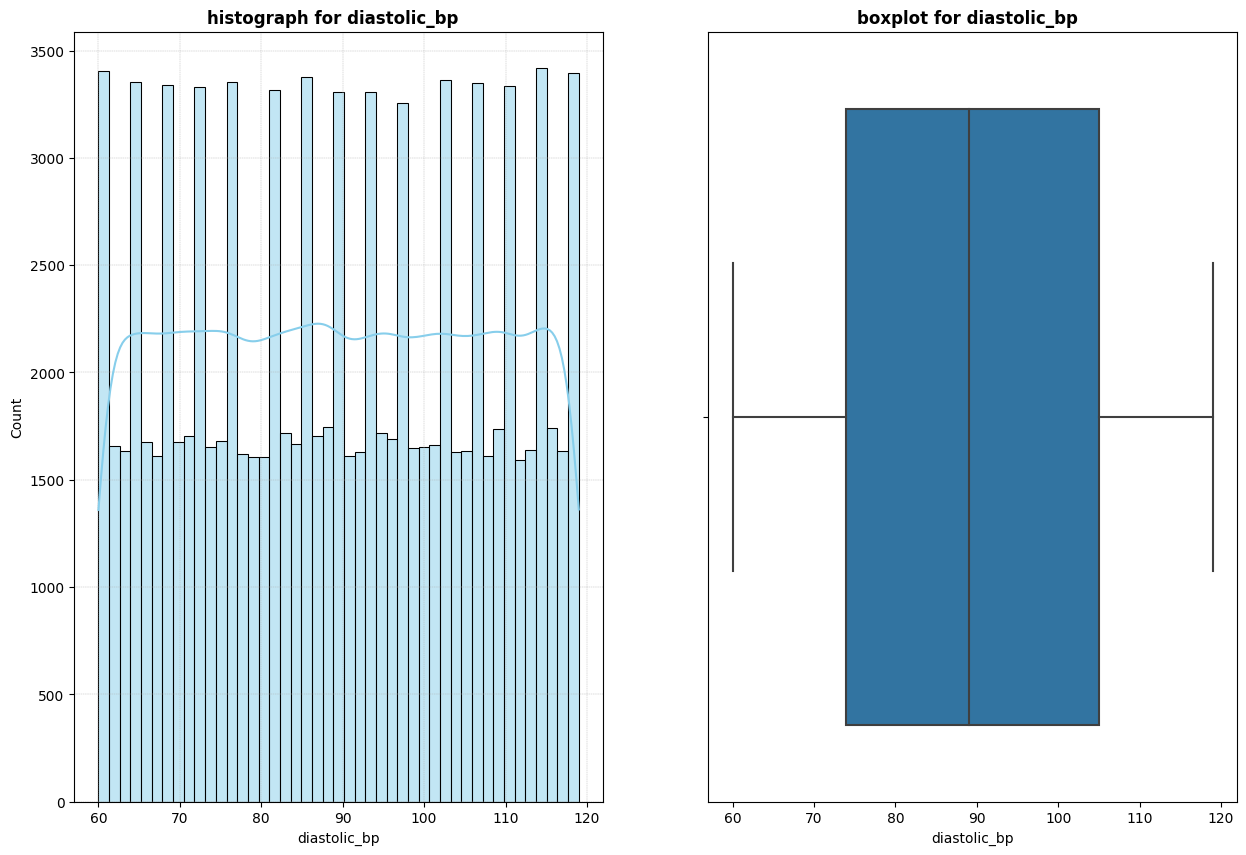

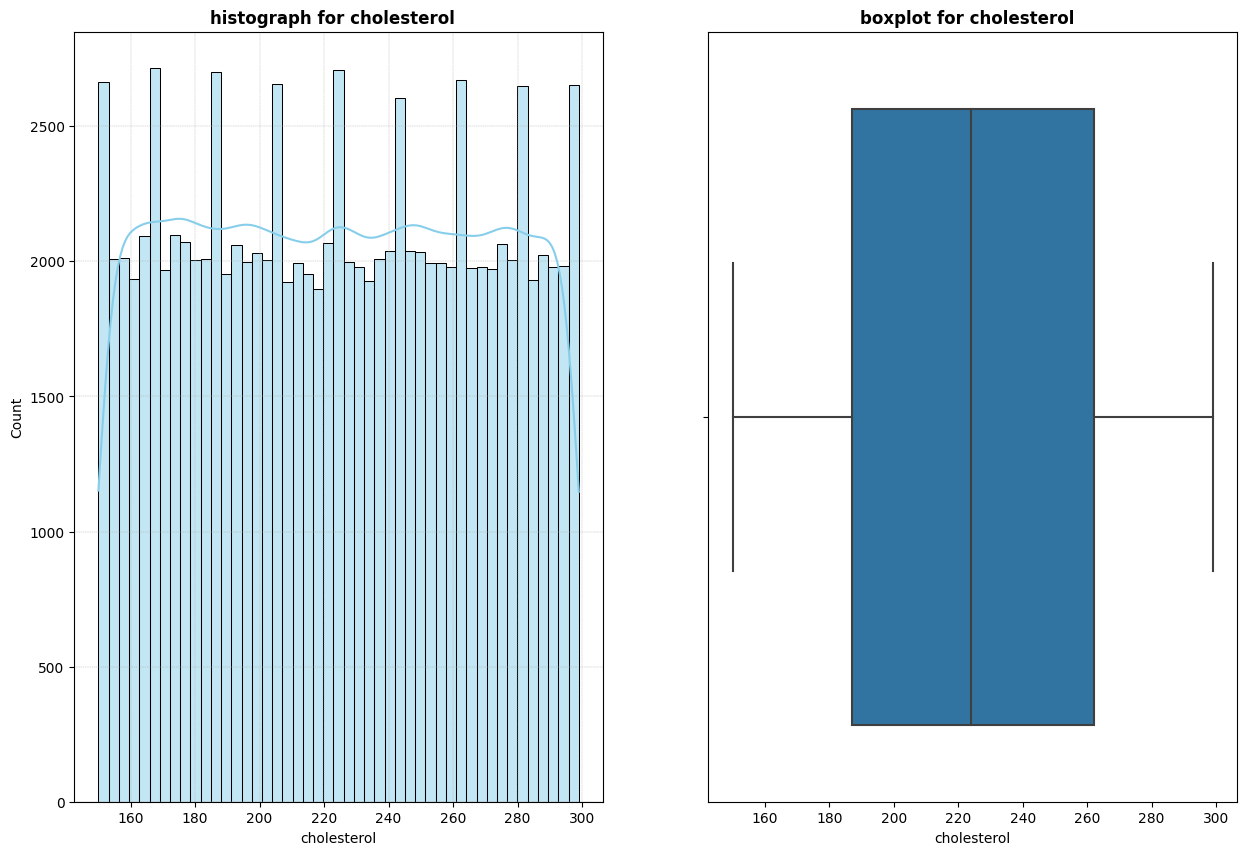

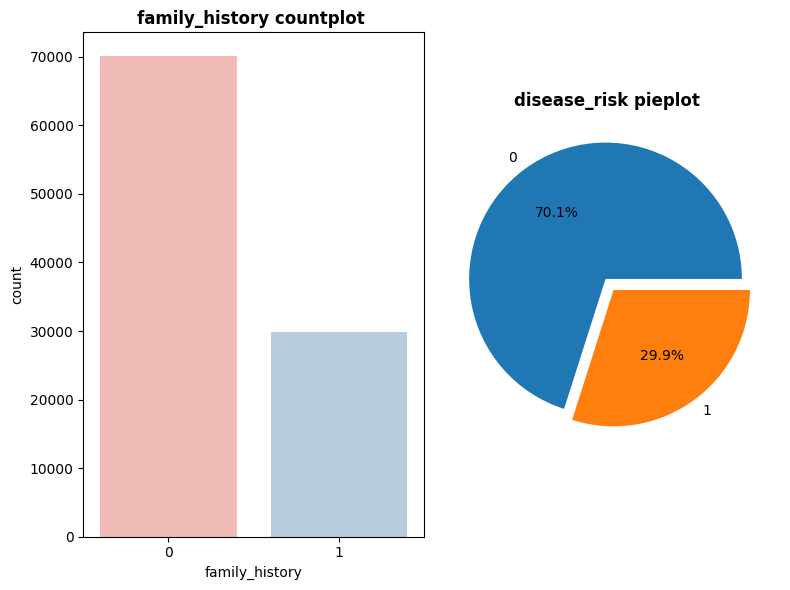

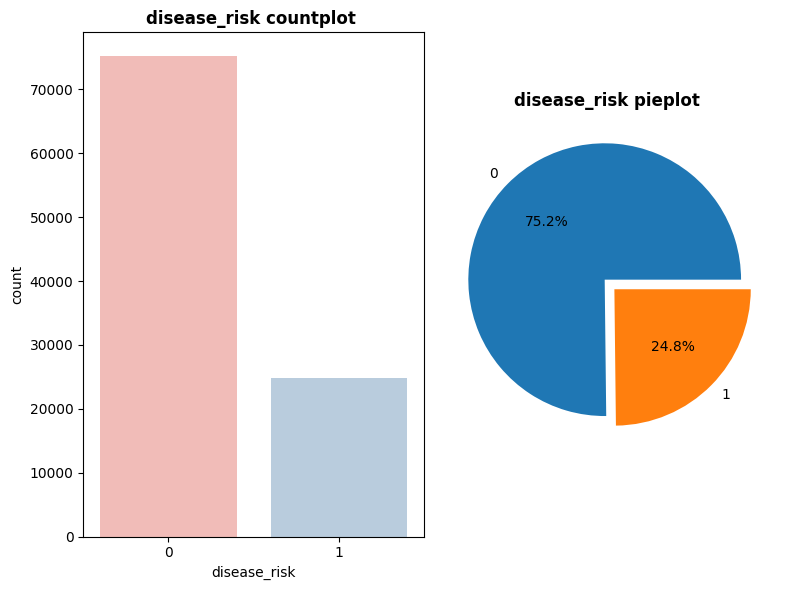

In [14]:
# LETS UNDERSTAND THE DISTRIBUTIN FOR ALL FEATURE
for col in df.columns:
    if df[col].nunique()<10:
        fig,ax = plt.subplots(1,2,figsize = (8,6))
        sns.countplot(x = col,data = df ,palette = "Pastel1",ax = ax[0])
        ax[0].set_title(f"{col} countplot ",fontsize = "large",fontweight='bold')
        ax[1].pie(df[col].value_counts(),labels =df[col].value_counts().index,explode =[0.05]*len(df[col].value_counts()),autopct = "%0.01f%%" )
        ax[1].set_title(f"disease_risk pieplot ",fontsize = "large",fontweight='bold')
        plt.tight_layout()
        plt.show()

    else:
        fig,ax = plt.subplots(1,2,figsize = (15,10))
        sns.histplot(x = col,data = df, color = "skyblue",edgecolor = "black",kde = True,ax = ax[0])
        ax[0].set_title(f"histograph for {col}  ",fontsize = "large",fontweight='bold')
        ax[0].grid(True, linestyle='--', linewidth=0.3)
        sns.boxplot(x = col ,data = df ,ax=ax[1])
        ax[1].set_title(f"boxplot for {col}  ",fontsize = "large",fontweight='bold')
        plt.show()
        
        

In [15]:
df.columns

Index(['age', 'gender', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l',
       'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk'],
      dtype='object')

## the distribution with respect to our target variable "disease_risk"

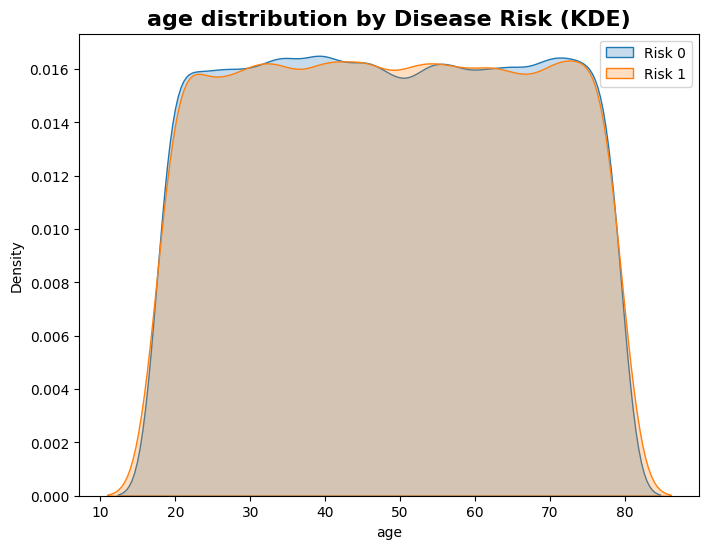

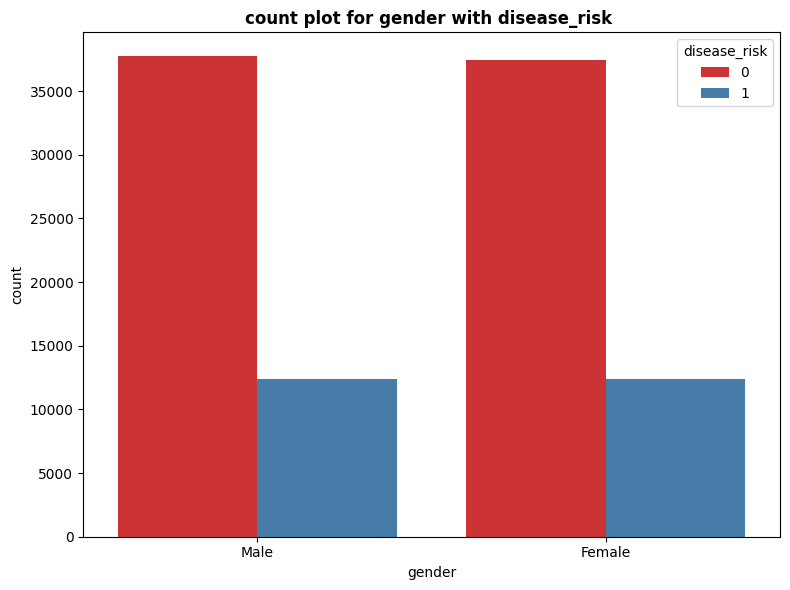

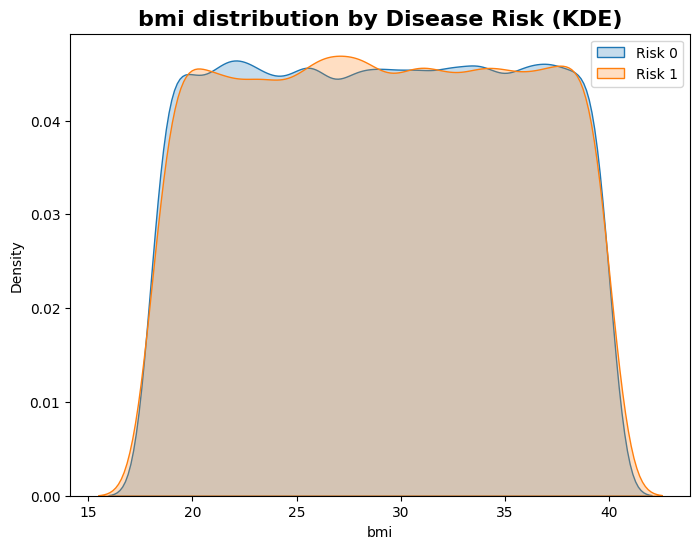

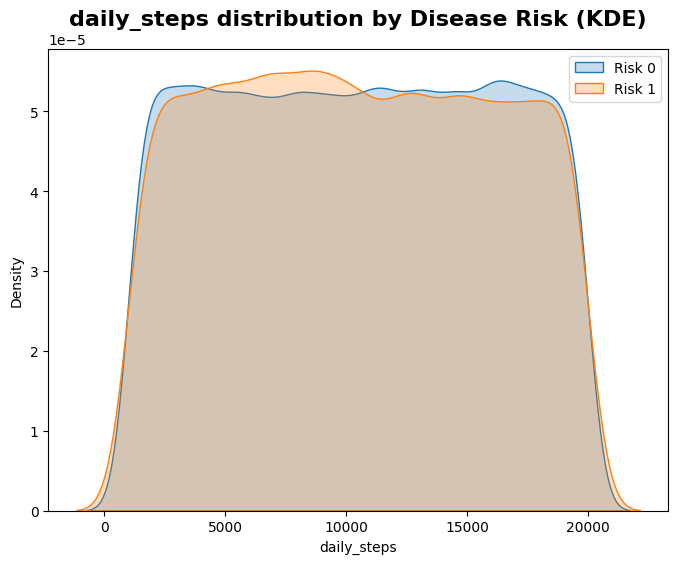

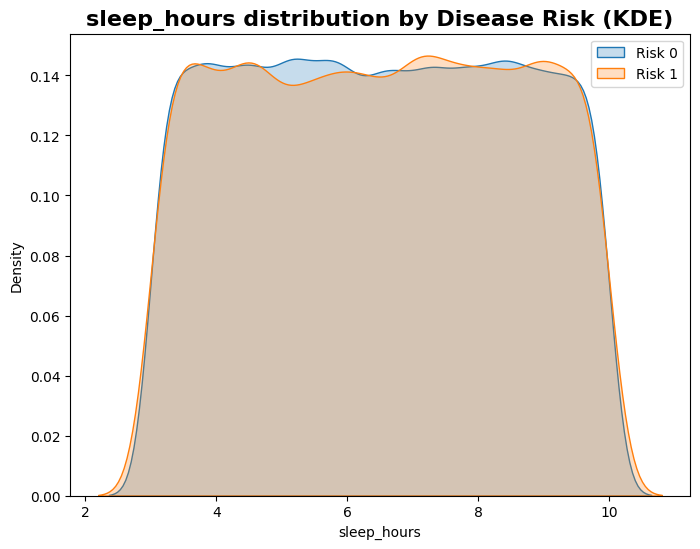

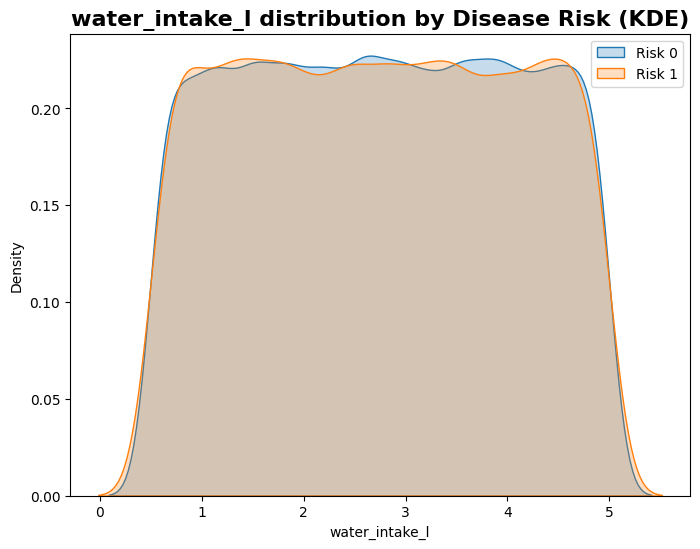

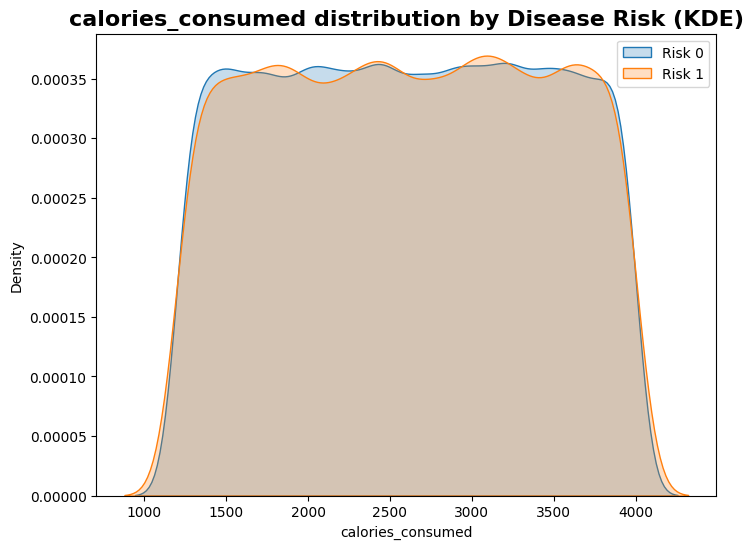

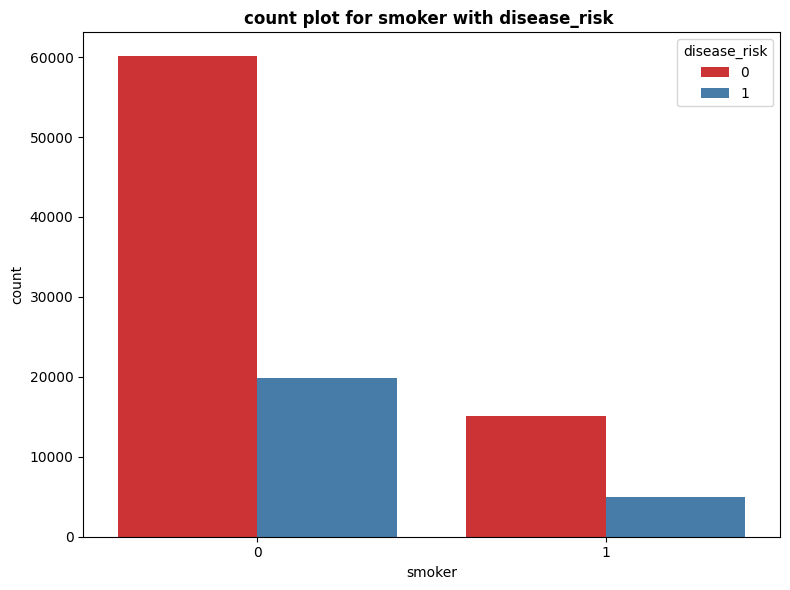

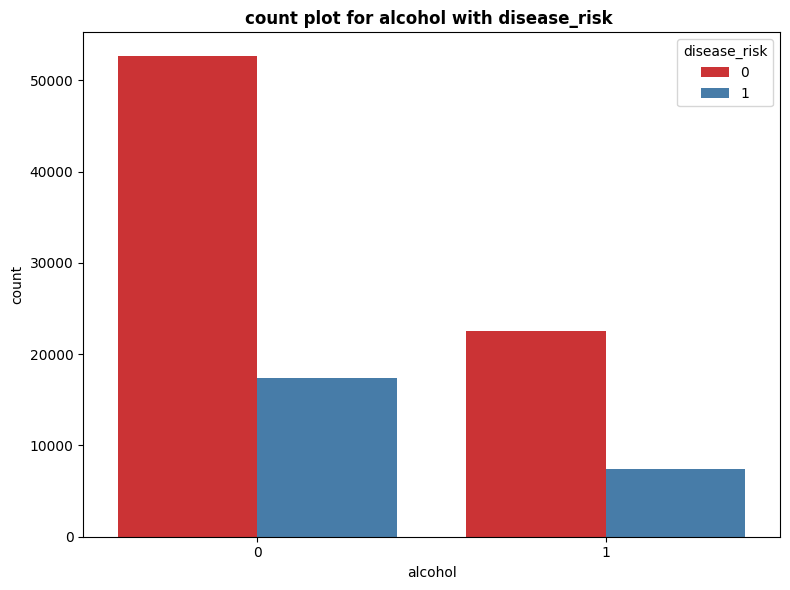

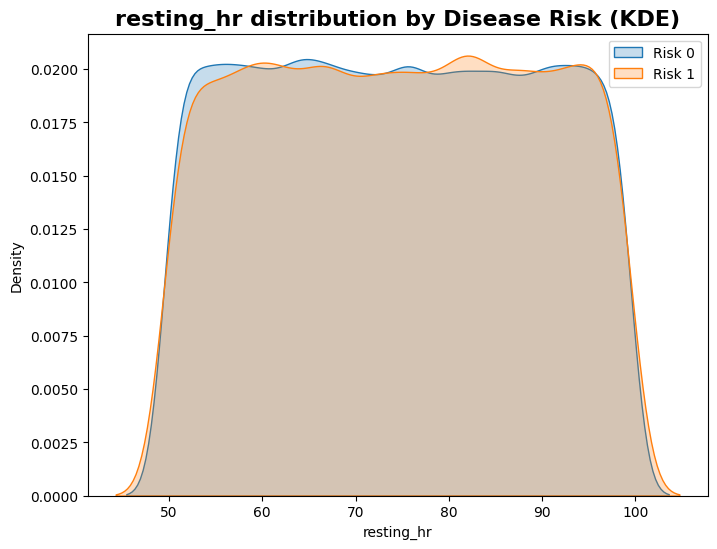

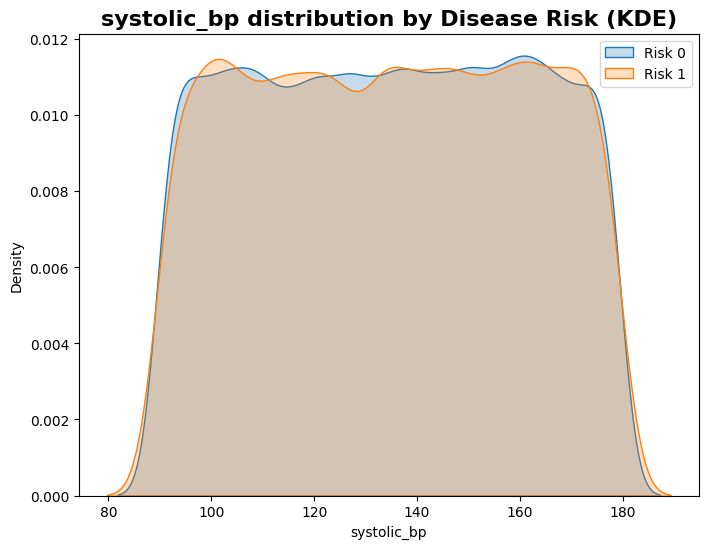

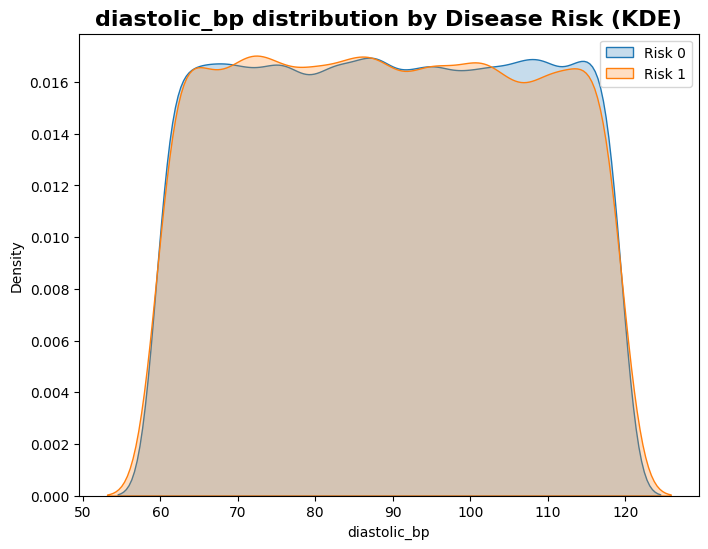

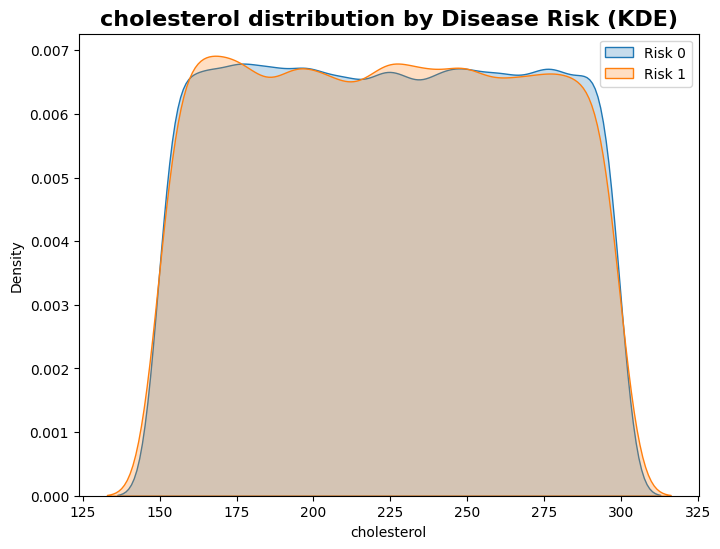

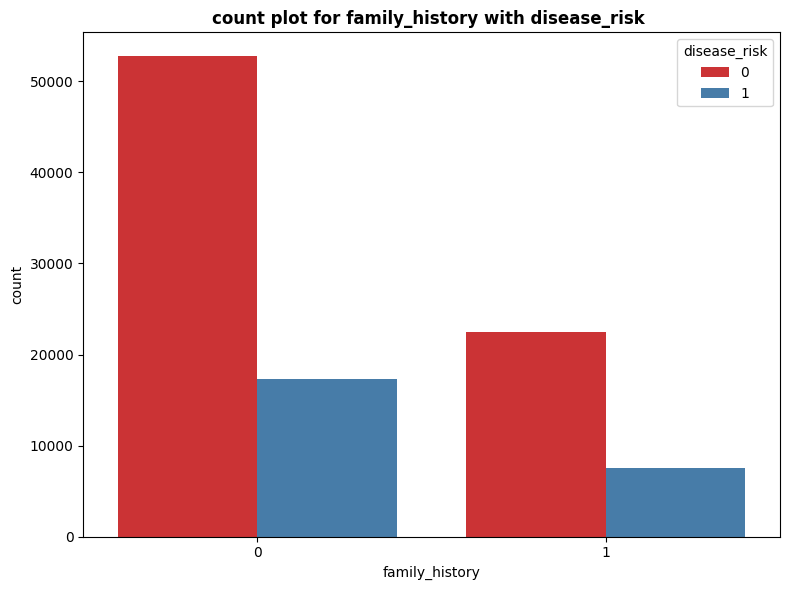

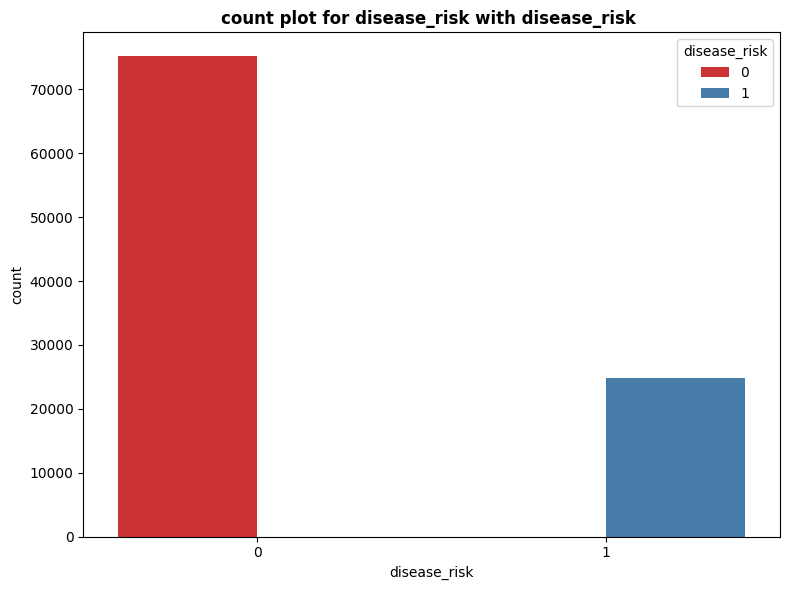

In [16]:
# lets understand the distribution with respect to our tagrget variable "disease_risk"
for col in df.columns:
    if df[col].nunique()<10:
        figure = plt.figure(figsize = (8,6))
        sns.countplot(x = col,data = df ,palette = "Set1",hue = "disease_risk")
        plt.title(f"count plot for {col} with disease_risk ",fontsize = "large",fontweight='bold')
        plt.tight_layout()
        plt.show()

    else:
        figure= plt.figure(figsize = (8,6))
        sns.kdeplot(data=df[df['disease_risk']==0], x=col, label="Risk 0", shade=True)
        sns.kdeplot(data=df[df['disease_risk']==1], x=col, label="Risk 1", shade=True)
        plt.title(f"{col} distribution by Disease Risk (KDE)", fontsize=16, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.legend()
        plt.show()


In [17]:
df

,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,53,Male,33.1,4726,3.9,2.0,3118,0,1,56,105,76,282,0,0
99996,22,Male,35.1,11554,4.5,3.1,1967,0,0,51,149,77,192,0,0
99997,37,Male,18.9,3924,3.8,1.0,2328,0,0,69,92,117,218,0,0
99998,72,Female,27.8,16110,5.6,0.8,3093,0,0,93,164,72,188,0,0


In [18]:
# lets do encoding for gender columns
df["gender"].replace({"Male": 1, "Female": 0}, inplace=True)


In [19]:
df

,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,56,1,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,69,0,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,46,1,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,32,0,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,60,0,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,53,1,33.1,4726,3.9,2.0,3118,0,1,56,105,76,282,0,0
99996,22,1,35.1,11554,4.5,3.1,1967,0,0,51,149,77,192,0,0
99997,37,1,18.9,3924,3.8,1.0,2328,0,0,69,92,117,218,0,0
99998,72,0,27.8,16110,5.6,0.8,3093,0,0,93,164,72,188,0,0


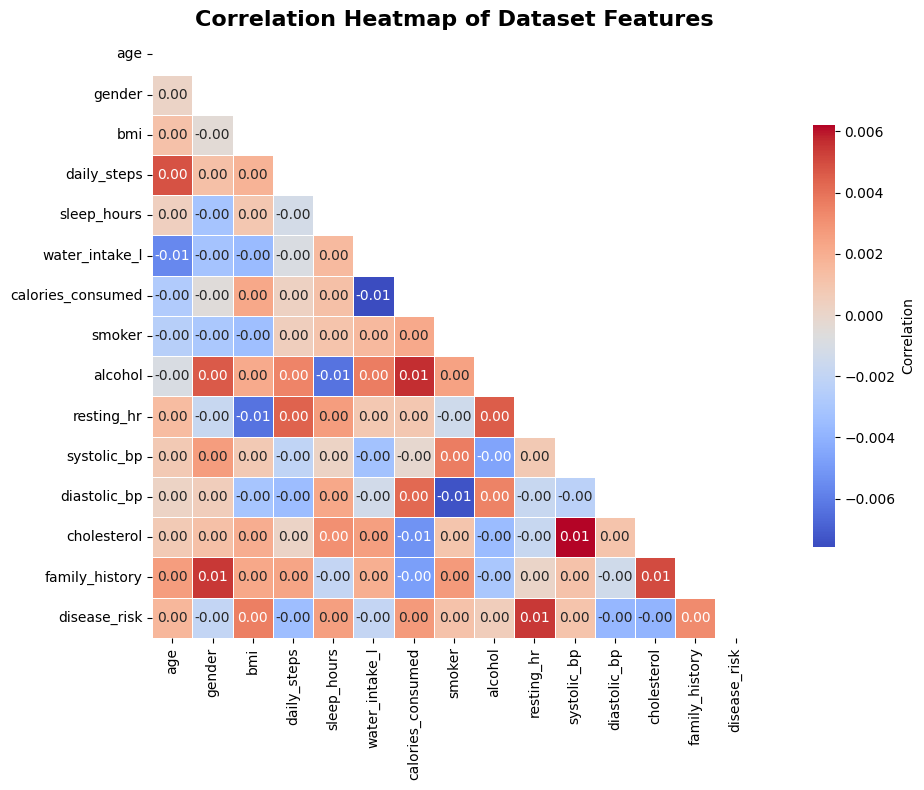

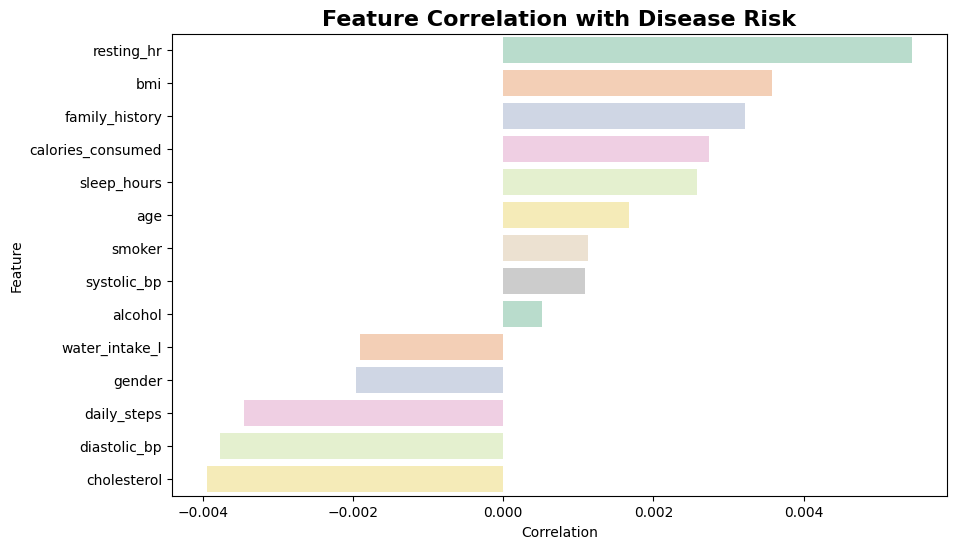

In [20]:


# Compute correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a mask for the upper triangle (optional, for better readability)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with seaborn
sns.heatmap(
    corr, 
    mask=mask, 
    annot=True,          # Show correlation values
    fmt=".2f",          # Format to 2 decimal places
    cmap="coolwarm",    # Color map
    linewidths=0.5,     # Lines between cells
    cbar_kws={"shrink": 0.7, "label": "Correlation"},  # Color bar options
    square=True
)

# Title
plt.title("Correlation Heatmap of Dataset Features", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

feature = corr["disease_risk"].sort_values(ascending = False)[1:]
feature_df = feature.reset_index()
feature_df.columns = ["Feature", "Correlation"]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Correlation", y="Feature", data=feature_df, palette="Pastel2")
plt.title("Feature Correlation with Disease Risk", fontsize=16, fontweight='bold')
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

## MACHINE MODELING

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns = "disease_risk"),df["disease_risk"],test_size = 0.2)


In [22]:
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
logr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
boost =GradientBoostingClassifier()
adboost = AdaBoostClassifier()
bag = BaggingClassifier()
models = [logr,knn,tree,svc,forest,boost,adboost,bag]

LogisticRegression(max_iter=1000) is successfully trained

Accuracy: 0.7520
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


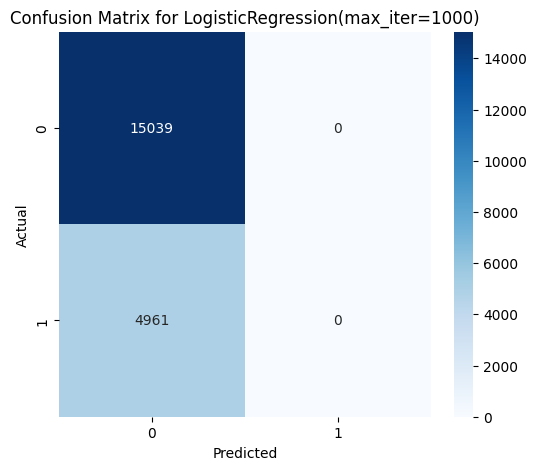



KNeighborsClassifier() is successfully trained

Accuracy: 0.6975
F1 Score: 0.1394
Precision: 0.2367
Recall: 0.0988


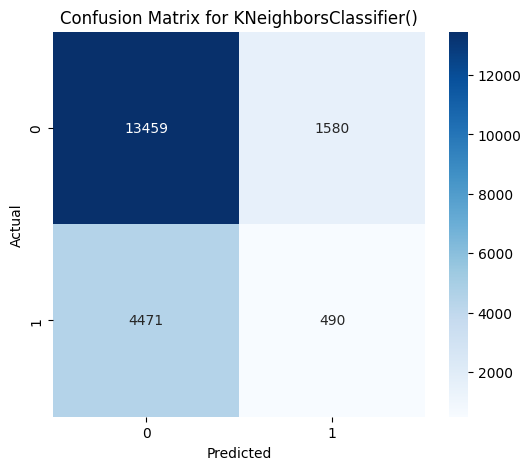



DecisionTreeClassifier() is successfully trained

Accuracy: 0.6218
F1 Score: 0.2663
Precision: 0.2566
Recall: 0.2768


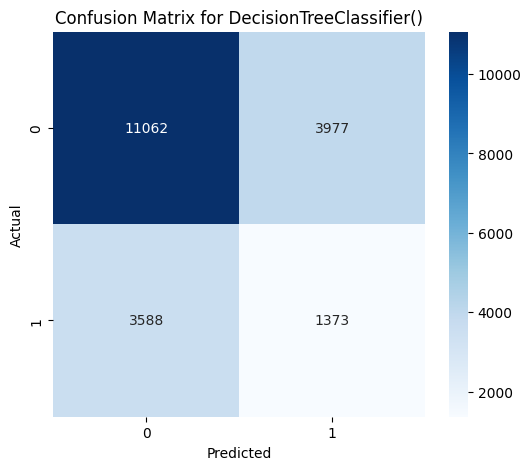



SVC() is successfully trained



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7520
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000


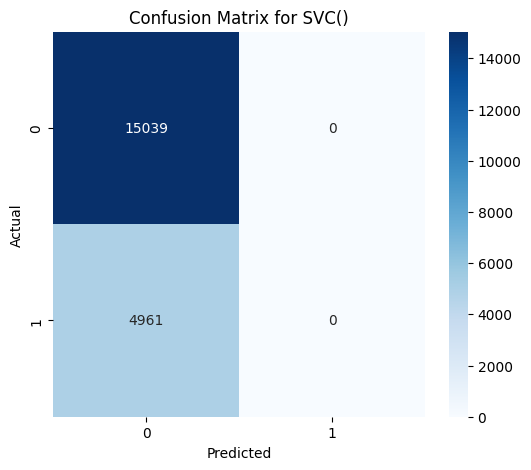



RandomForestClassifier() is successfully trained

Accuracy: 0.7518
F1 Score: 0.0012
Precision: 0.3333
Recall: 0.0006


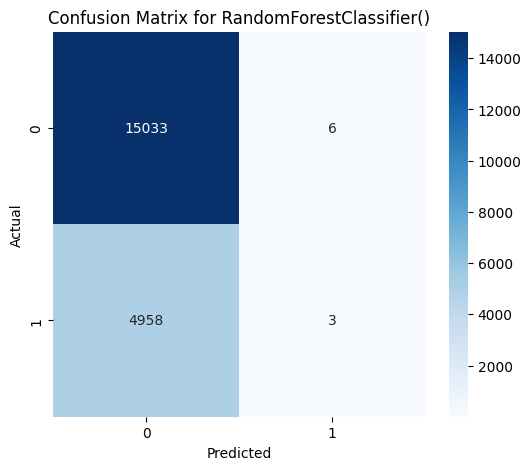



GradientBoostingClassifier() is successfully trained

Accuracy: 0.7519
F1 Score: 0.0004
Precision: 0.3333
Recall: 0.0002


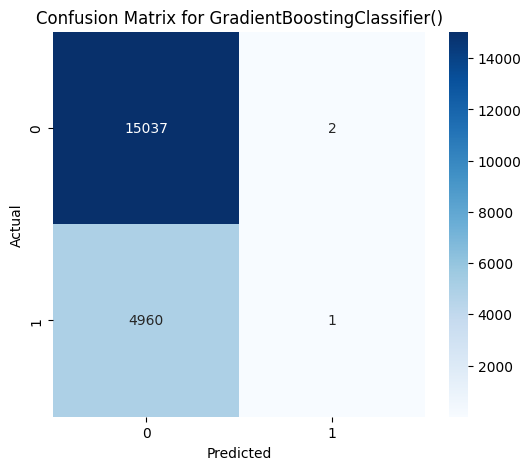



AdaBoostClassifier() is successfully trained

Accuracy: 0.7520
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


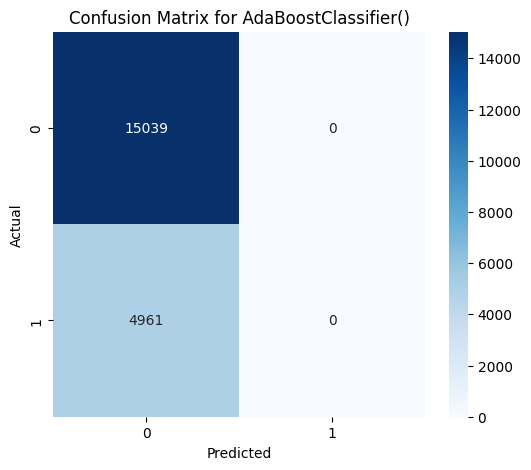



BaggingClassifier() is successfully trained

Accuracy: 0.7316
F1 Score: 0.0726
Precision: 0.2539
Recall: 0.0423


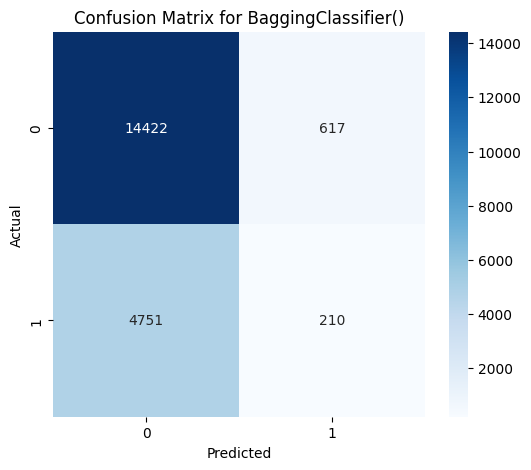

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


for model in models:
    # Train the model
    model.fit(xtrain, ytrain)
    print(f"{model} is successfully trained\n")
    
    # Make predictions
    y_pred = model.predict(xtest)
    
    # If using some models like Keras, convert probabilities to binary labels
    if y_pred.ndim > 1:  # for keras output
        y_pred = (y_pred > 0.5).astype(int)
    
    # Calculate metrics
    acc = accuracy_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(ytest, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model}")
    plt.show()
    
    print("\n" + "="*100 + "\n")


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


adam = Adam(learning_rate=0.001)

2025-09-23 08:13:45.100679: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758615225.343340      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758615225.416135      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1758615238.283524      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [25]:
model = Sequential()
model.add(Dense(200,activation = "relu",input_dim = 14))
model.add(Dense(128,activation = "relu"))
model.add(Dense(100,activation = "relu"))
model.add(Dense(50,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │         3,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,729 (182.54 KB)

 Trainable params: 46,729 (182.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer = "adam",loss="binary_crossentropy",metrics =["accuracy"])


In [28]:
history = model.fit(xtrain, ytrain,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10


I0000 00:00:1758615242.209737      61 service.cc:148] XLA service 0x7cd86c005650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758615242.210402      61 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758615242.561834      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


  71/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6201 - loss: 72.6405

I0000 00:00:1758615243.331237      61 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6441 - loss: 11.4158 - val_accuracy: 0.7506 - val_loss: 0.5803
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7352 - loss: 0.6314 - val_accuracy: 0.4404 - val_loss: 0.7147
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7452 - loss: 0.5868 - val_accuracy: 0.7506 - val_loss: 0.5639
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7520 - loss: 0.5608 - val_accuracy: 0.7506 - val_loss: 0.5617
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7517 - loss: 0.5605 - val_accuracy: 0.7506 - val_loss: 0.5616
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7507 - loss: 0.5617 - val_accuracy: 0.7506 - val_loss: 0.5617
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7520 - loss: 0.5603 - val_accuracy: 0.7506 - val_loss: 0.5617
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7502 - loss: 0.5623 - val_accura

In [29]:
loss , accuracy = model.evaluate(xtest,ytest)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7531 - loss: 0.5590


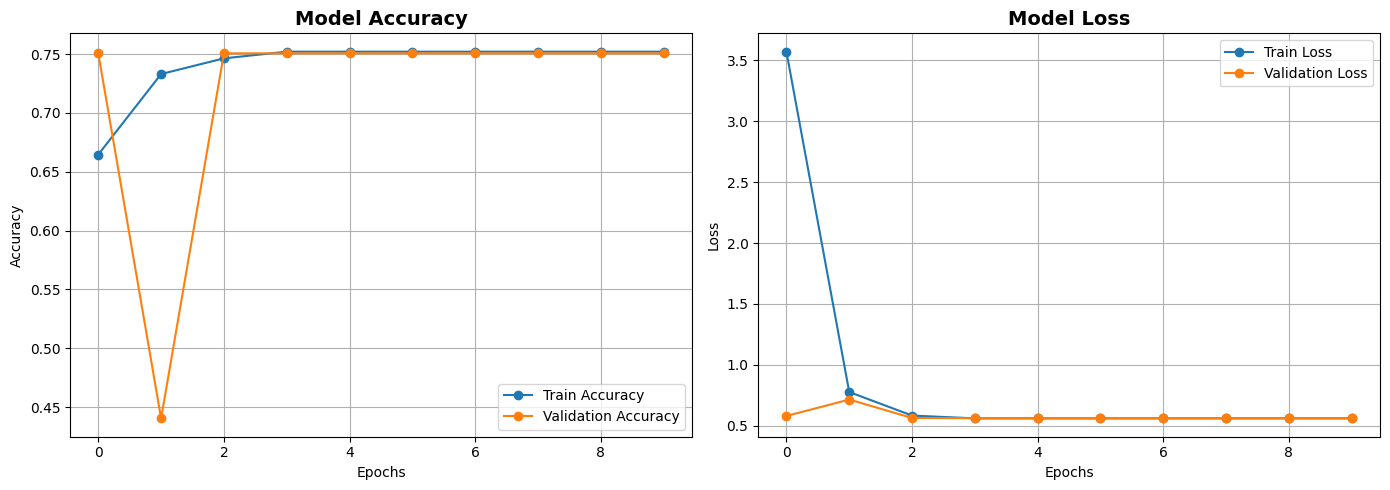

In [30]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [31]:
# thanks please upvote !